In [1]:
#from __future__ import absolute_import, division, print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

pd.set_option('display.max_columns', 120)

In [3]:
with pd.HDFStore("/Users/rlx/datasets/twosigma/train.h5", "r") as train:
    df = train.get("train")

In [4]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,NaN,-0.072108,0.249187,0.024401,-0.127942,NaN,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,NaN,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,NaN,0.037680,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.273957,NaN,-2.0,-2.0,NaN,0.001652,-2.0,NaN,-2.0,NaN,0.652981,0.000000,-0.142453,0.0,NaN,NaN,1.427469,NaN,-2.0,0.0,NaN,NaN,NaN,0.0,0.937880,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.09675,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,NaN,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,NaN,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.159432,NaN,0.0,-2.0,NaN,0.004317,0.0,NaN,-2.0,NaN,-0.399520,0.000000,-0.309356,-0.5,NaN,NaN,0.154613,NaN,0.0,0.0,NaN,NaN,NaN,0.5,0.232154,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,NaN,NaN,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,NaN,0.172751,0.961091,1.028205,-0.165369,0.056006,NaN,0.249530,-0.156078,NaN,0.019192,0.053364,-0.020247,NaN,0.064028,-0.249106,-0.106216,-0.085509,0.383589,NaN,-0.074021,-0.054295,-0.746073,-0.057605,-0.126238,0.462523,0.060902,NaN,-0.262892,-0.059395,0.562975,-0.026392,0.013430,-0.627150,-0.470362,-0.101865,0.436794,-0.057049,-0.120851,-0.061941,-0.600019,0.138357,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.227811,NaN,-2.0,-2.0,NaN,0.000000,-2.0,NaN,-2.0,NaN,-0.496284,0.006942,0.122841,-0.5,NaN,NaN,0.378332,NaN,-2.0,

In [52]:
asset = 11
dfa = df[df.id==asset]
dfa.shape, df.shape

((1813, 111), (1710756, 111))

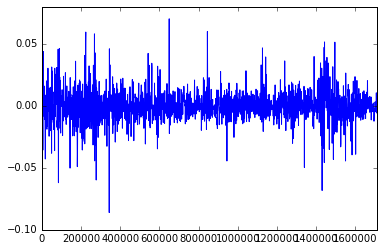

In [53]:
dfa.y.plot()

In [54]:
print np.sum(np.sum(dfa.isnull()==True))
np.sum(dfa.isnull()==True)

4768


id                   0
timestamp            0
derived_0            0
derived_1            0
derived_2            0
derived_3            0
derived_4            0
fundamental_0        0
fundamental_1        0
fundamental_2        0
fundamental_3        0
fundamental_5        0
fundamental_6        0
fundamental_7        0
fundamental_8        0
fundamental_9        0
fundamental_10       0
fundamental_11       0
fundamental_12       0
fundamental_13       0
fundamental_14       0
fundamental_15       0
fundamental_16       0
fundamental_17       0
fundamental_18       0
fundamental_19       0
fundamental_20       0
fundamental_21       0
fundamental_22    1813
fundamental_23       0
                  ... 
technical_13         0
technical_14         0
technical_16        21
technical_17         0
technical_18        21
technical_19         0
technical_20         0
technical_21         0
technical_22         0
technical_24        43
technical_25       142
technical_27         0
technical_2

In [55]:
dfa = dfa[dfa.columns[np.sum(dfa.isnull()==True)==0]]
print np.sum(np.sum(dfa.isnull()==True))
dfa.head()

0


,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_2,technical_6,technical_7,technical_10,technical_11,technical_13,technical_14,technical_17,technical_19,technical_20,technical_21,technical_22,technical_27,technical_29,technical_30,technical_34,technical_35,technical_36,technical_40,technical_43,y
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.09675,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.11852,-0.123511,0.113818,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075,-0.280418,-2.0,-2.0,-0.159432,0.0,-2.0,0.004317,0.0,-2.0,-0.399520,0.0,-0.309356,-0.5,0.154613,0.0,0.0,0.5,0.232154,0.025590,-0.273607,-2.0,-0.001240
751,11,1,0.014765,-0.038064,-0.017425,0.322381,-0.034134,0.004526,0.114285,-0.209772,0.216281,0.09675,0.082042,-0.224114,-0.085529,0.025070,-0.062337,-0.201601,1.746692,-0.187505,-0.034664,-0.135056,0.305562,0.027595,-0.208273,0.11852,-0.123573,0.113818,-0.115837,0.028666,0.076565,-0.217227,0.100054,0.358808,0.057505,0.025850,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.125917,-0.131619,0.232268,-0.001455,-0.489863,0.017115,0.027073,0.334183,0.113513,0.111602,-0.179379,0.221287,-0.091451,0.107982,0.548687,-0.160079,-0.280354,0.063933,-0.235086,-0.204763,-0.194137,-0.365186,0.041928,-0.044588,-0.039079,-0.075,-0.280418,-2.0,-2.0,-0.161022,0.0,-2.0,0.002259,0.0,-2.0,-0.411560,0.0,-0.269781,-0.5,0.080653,0.0,0.0,0.5,0.250774,0.015573,-0.277782,-2.0,-0.002024
1501,11,2,0.014765,-0.038064,-0.017425,0.323070,-0.034134,0.004571,0.114285,-0.209608,0.216281,0.09675,0.082042,-0.224007,-0.085529,0.025192,-0.062337,-0.201344,1.746692,-0.187505,-0.034664,-0.135008,0.305562,0.027595,-0.208085,0.11852,-0.123598,0.113818,-0.115837,0.028819,0.076565,-0.217179,0.100054,0.358808,0.057505,0.025902,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.125791,-0.131619,0.232268,-0.001455,-0.489863,0.017034,0.026975,0.334183,0.113513,0.111628,-0.179379,0.221287,-0.091277,0.107982,0.548687,-0.160079,-0.279950,0.063933,-0.234864,-0.204635,-0.194052,-0.365186,0.041928,-0.044462,-0.039079,-0.075,-0.280418,-2.0,-2.0,-0.161656,0.0,-2.0,0.001911,0.0,-2.0,-0.416357,0.0,-0.254014,-0.5,0.051186,0.0,0.0,0.5,0.258193,0.011582,-0.279445,-2.0,0.008788
2251,11,3,0.014765,-0.038064,-0.017425,0.323664,-0.034134,0.004609,0.114285,-0.209466,0.216281,0.09675,0.082042,-0.223914,-0.085529,0.025297,-0.062337,-0.201122,1.746692,-0.187505,-0.034664,-0.134967,0.305562,0.027595,-0.207922,0.11852,-0.123619,0.113818,-0.115837,0.028951,0.076565,-0.217138,0.100054,0.358808,0.057505,0.025947,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.125683,-0.131619,0.232268,-0.001455,-0.489863,0.016965,0.026890,0.334183,0.113513

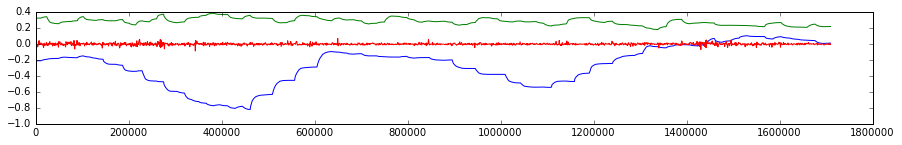

In [56]:
plt.figure(figsize=(15,2))
plt.plot(dfa.fundamental_2)
plt.plot(dfa.derived_3)
plt.plot(dfa.y)

In [57]:
id_counts = df.groupby(by="id").timestamp.count()
id_counts = id_counts[id_counts==np.max(id_counts)]
id_counts.index.values

array([  11,   12,   25,   26,   31,   38,   39,   40,   41,   43,   44,
         54,   59,   60,   68,   76,   79,   80,   82,   83,   87,   95,
         98,  113,  118,  121,  124,  128,  130,  132,  140,  142,  152,
        154,  156,  160,  172,  175,  176,  184,  186,  187,  191,  195,
        199,  203,  206,  215,  216,  217,  219,  223,  224,  225,  229,
        232,  235,  240,  242,  244,  248,  249,  252,  255,  257,  259,
        261,  262,  265,  266,  268,  269,  273,  287,  290,  296,  300,
        317,  318,  319,  338,  341,  347,  348,  349,  351,  352,  358,
        365,  372,  383,  388,  395,  396,  413,  425,  430,  433,  438,
        441,  445,  451,  452,  453,  467,  468,  480,  481,  484,  490,
        492,  500,  505,  506,  507,  509,  510,  512,  513,  520,  523,
        527,  529,  530,  531,  532,  535,  536,  542,  543,  545,  548,
        557,  558,  559,  565,  571,  578,  580,  583,  584,  586,  587,
        588,  591,  593,  602,  605,  608,  611,  6

# Single asset, single time point prediction (as clasification, y above or below zero)

In [58]:
input_cols = np.array([i for i in dfa.columns if i.startswith("derived") \
                                              or i.startswith("fundamental") \
                                              or i.startswith("technical")])
X = dfa[input_cols].as_matrix()
y = dfa.y.as_matrix()
y_discrete = (y>0)*1
print X.shape, y.shape

(1813, 86) (1813,)


In [60]:
scores = cross_val_score(RandomForestClassifier(), X, y_discrete, cv=5)
print np.mean(scores), np.std(scores)

0.47435727204 0.0525102661046


In [61]:
bootstrap(RandomForestClassifier(), X, y_discrete, n=10, test_size=0.33)

. . . . . . . . . .
train 0.95881383855 0.0113522537563
test  0.506844741235 0.0113522537563


In [21]:
from sklearn.decomposition import PCA
Xt = PCA(n_components=2).fit_transform(X)
scores = cross_val_score(RandomForestClassifier(), Xt, y_discrete, cv=5)
print np.mean(scores), np.std(scores)

0.451968255426 0.0380025937757


In [22]:
bootstrap(RandomForestClassifier(), Xt, y_discrete, n=10, test_size=0.33)


. . . . . . . . . .
train 0.9625 0.0145511669391
test  0.494453781513 0.0145511669391


In [23]:
from sklearn.svm import SVC
bootstrap(SVC(gamma=.1, C=100), Xt, y_discrete, n=10, test_size=0.33)


. . . . . . . . . .
train 0.61332781457 0.0113043171232
test  0.486386554622 0.0113043171232


In [24]:
bootstrap(SVC(gamma=1e-4), X, y_discrete, n=10, test_size=0.33)


. . . . . . . . . .
train 0.534437086093 0.0159451428776
test  0.505378151261 0.0159451428776


# single asset lookback

In [62]:

def getXy(df, ycol="y"):
    input_cols = np.array([i for i in df.columns  if i.startswith("derived") \
                                                     or i.startswith("fundamental") \
                                                     or i.startswith("technical")\
                                                     or i.startswith("y_t")])
    X = df[input_cols]
    y = df[ycol].as_matrix()
    y_discrete = (y>0)*1
    return X,y_discrete


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def assetdf(df, asset, lookback):
    dfa = df[df.id==asset]
    dfa = dfa[dfa.columns[np.sum(dfa.isnull()==True)==0]]
    dfa_t = dfa.iloc[1:].reset_index(drop=True).join(dfa.iloc[:-1].reset_index(drop=True), how="outer", rsuffix="_t-1")
    for i in range(1,lookback):
        dfa_t = dfa_t.iloc[1:].reset_index(drop=True).join(dfa.iloc[:-1-i].reset_index(drop=True), how="outer", rsuffix="_t-"+str(i+1))
    return dfa_t

def multiple_assets_loopback(df, assets, loopback):

    r = assetdf(df, assets[0], loopback)
    r.columns = [i+":"+str(assets[0]) for i in r.columns]
    for asset in assets[1:]:
        da = assetdf(df, asset, loopback)
        da.columns = [i+":"+str(asset) for i in da.columns]

        r = r.join(da, how="outer")
        
    return r.dropna()


def bootstrap(estimator, X, y, n, test_size):
    train_scores, test_scores = [], []
    for i in range(n):
        print ".",
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        estimator.fit(X_train, y_train)
        train_scores.append(estimator.score(X_train, y_train))
        test_scores.append(estimator.score(X_test, y_test))

    print   
    print "train", np.mean(train_scores), np.std(test_scores)
    print "test ", np.mean(test_scores), np.std(test_scores)

In [69]:
d11 = assetdf(df, asset=22, lookback=10)
cols = [i for i in d11.columns if i.startswith("y")]# or i.startswith("technical_7")]
print d11.shape, dfa.shape
d11[cols].head(10)

(1432, 55) (1813, 89)


,y,y_t-1,y_t-2,y_t-3,y_t-4,y_t-5,y_t-6,y_t-7,y_t-8,y_t-9,y_t-10
0,-0.033692,0.009456,0.011280,0.006640,0.012067,-0.012999,-0.008501,-0.013258,-0.004281,-0.016024,-0.000420
1,0.041595,-0.033692,0.009456,0.011280,0.006640,0.012067,-0.012999,-0.008501,-0.013258,-0.004281,-0.016024
2,-0.008215,0.041595,-0.033692,0.009456,0.011280,0.006640,0.012067,-0.012999,-0.008501,-0.013258,-0.004281
3,-0.000645,-0.008215,0.041595,-0.033692,0.009456,0.011280,0.006640,0.012067,-0.012999,-0.008501,-0.013258
4,0.002051,-0.000645,-0.008215,0.041595,-0.033692,0.009456,0.011280,0.006640,0.012067,-0.012999,-0.008501
5,-0.035031,0.002051,-0.000645,-0.008215,0.041595,-0.033692,0.009456,0.011280,0.006640,0.012067,-0.012999
6,-0.002116,-0.035031,0.002051,-0.000645,-0.008215,0.041595,-0.033692,0.009456,0.011280,0.006640,0.012067
7,-0.017364,-0.002116,-0.035031,0.002051,-0.000645,-0.008215,0.041595,-0.033692,0.009456,0.011280,0.006640
8,-0.006404,-0.017364,-0.002116,-0.035031,0.002051,-0.000645,-0.008215,0.041595,-0.033692,0.009456,0.011280
9,0.010214,-0.006404,-0.017364,-0.002116,-0.035031,0.002051,-0.000645,-0.008215,0.041595,-0.033692,0.009456


In [65]:
X,y = getXy(d11)
y[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [70]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print np.mean(scores), np.std(scores)

0.456829597876 0.0546199805848


In [28]:
bootstrap(RandomForestClassifier(), X, y, n=10, test_size=0.33)

. . . . . . . . . .
train 0.965841584158 0.0135069033487
test  0.492642140468 0.0135069033487


In [67]:
from sklearn.svm import SVC
bootstrap(SVC(gamma=1e-4), X, y, n=10, test_size=0.33)

. . . . . . . . . .
train 0.507508250825 0.0200285307846
test  0.514214046823 0.0200285307846


In [30]:
d11 = assetdf(df, asset=11, lookback=30)
X,y = getXy(d11)
print d11.shape
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print np.mean(scores), np.std(scores)

(1783, 2759)
0.459391643982 0.0324369029945


# Multiple asset lookback

In [31]:
print id_counts.index.values

[  11   12   25   26   31   38   39   40   41   43   44   54   59   60   68
   76   79   80   82   83   87   95   98  113  118  121  124  128  130  132
  140  142  152  154  156  160  172  175  176  184  186  187  191  195  199
  203  206  215  216  217  219  223  224  225  229  232  235  240  242  244
  248  249  252  255  257  259  261  262  265  266  268  269  273  287  290
  296  300  317  318  319  338  341  347  348  349  351  352  358  365  372
  383  388  395  396  413  425  430  433  438  441  445  451  452  453  467
  468  480  481  484  490  492  500  505  506  507  509  510  512  513  520
  523  527  529  530  531  532  535  536  542  543  545  548  557  558  559
  565  571  578  580  583  584  586  587  588  591  593  602  605  608  611
  615  618  620  624  631  636  637  646  651  654  656  657  667  669  677
  679  684  686  689  690  691  696  697  699  703  704  707  709  711  713
  719  722  727  728  748  751  753  757  761  765  766  789  794  796  800
  806  809  

In [71]:
#r = multiple_assets_loopback(df, [11,12,15,16,19,20], 10)
r = multiple_assets_loopback(df, [11,12], 2)
print r.shape
col = "y"
r[[i for i in r.columns if i.startswith(col)]].head()

(1811, 516)


,y:11,y_t-1:11,y_t-2:11,y:12,y_t-1:12,y_t-2:12
0,0.008788,-0.002024,-0.001240,0.029279,-0.020101,-0.020940
1,-0.006551,0.008788,-0.002024,0.021253,0.029279,-0.020101
2,-0.004336,-0.006551,0.008788,-0.026892,0.021253,0.029279
3,-0.022718,-0.004336,-0.006551,0.004163,-0.026892,0.021253
4,-0.035710,-0.022718,-0.004336,0.003780,0.004163,-0.026892


In [72]:
X,y = getXy(r, "y:12")
print y[:5]
X[[i for i in X.columns if i.startswith("y")]].head()

[1 1 0 1 1]


,y_t-1:11,y_t-2:11,y_t-1:12,y_t-2:12
0,-0.002024,-0.001240,-0.020101,-0.020940
1,0.008788,-0.002024,0.029279,-0.020101
2,-0.006551,0.008788,0.021253,0.029279
3,-0.004336,-0.006551,-0.026892,0.021253
4,-0.022718,-0.004336,0.004163,-0.026892


In [73]:
X,y = getXy(r, "y:11")
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print np.mean(scores), np.std(scores)

0.457726397682 0.0504383851352


In [38]:
from sklearn.naive_bayes import GaussianNB
bootstrap(GaussianNB(), X, y, n=10, test_size=0.33)

. . . . . . . . . .
train 0.549051937345 0.0183375520062
test  0.517558528428 0.0183375520062


In [74]:
n_assets, loopback = 10, 2
cols = ["id", "timestamp", "y"]+[i for i in df.columns if i.startswith("fundamental")]

assets = np.random.permutation(id_counts.index.values)[:n_assets]
print assets
r = multiple_assets_loopback(df[cols], assets, loopback)
print "predicting for asset", assets[0]
X,y = getXy(r, "y:"+str(assets[0]))
print "data shape", X.shape
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print np.mean(scores), np.std(scores)

[2057 1895 1579 1981 2008 1516 1680  959  244  529]
predicting for asset 2057
data shape (1811, 1580)
0.452802717576 0.0216250437733


In [75]:
bootstrap(RandomForestClassifier(), X, y, 10, .33)

. . . . . . . . . .
train 0.969497114592 0.00986480348077
test  0.478260869565 0.00986480348077


In [41]:
bootstrap(GaussianNB(), X, y, 10, .33)

. . . . . . . . . .
train 0.534789777411 0.0081649201443
test  0.514381270903 0.0081649201443


In [81]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
Xt = PCA(n_components=2).fit_transform(X)
bootstrap(GaussianNB(), Xt, y, 10, .33)

. . . . . . . . . .
train 0.502473206925 0.0174146036365
test  0.505852842809 0.0174146036365


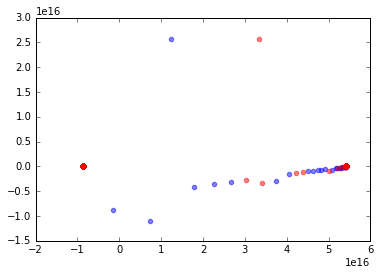

In [79]:
plt.scatter(Xt[y==0][:,0], Xt[y==0][:,1], color="blue", alpha=0.5)
plt.scatter(Xt[y==1][:,0], Xt[y==1][:,1], color="red", alpha=0.5)

In [44]:
from sklearn.preprocessing import StandardScaler
for asset in assets:
    X,y = getXy(r, "y:"+str(asset))
    Xt = StandardScaler().fit_transform(X)
    Xt = PCA(n_components=2).fit_transform(X)
    print "\n asset", asset,
    bootstrap(GaussianNB(), Xt, y, 10, .33)



 asset 1887 . . . . . . . . . .
train 0.517889530091 0.0183611735536
test  0.48127090301 0.0183611735536

 asset 1390 . . . . . . . . . .
train 0.527947238252 0.0260252464517
test  0.508862876254 0.0260252464517

 asset 1704 . . . . . . . . . .
train 0.518631492168 0.0176981232263
test  0.503846153846 0.0176981232263

 asset 751 . . . . . . . . . .
train 0.52572135202 0.0112687194574
test  0.512876254181 0.0112687194574

 asset 265 . . . . . . . . . .
train 0.523248145095 0.0165374385486
test  0.503344481605 0.0165374385486

 asset 1727 . . . . . . . . . .
train 0.523825226711 0.0285145253071
test  0.500334448161 0.0285145253071

 asset 1774 . . . . . . . . . .
train 0.528524319868 0.0100890321933
test  0.518394648829 0.0100890321933

 asset 2095 . . . . . . . . . .
train 0.528606760099 0.0134913668572
test  0.498160535117 0.0134913668572

 asset 1448 . . . . . . . . . .
train 0.51780708986 0.0205052455598
test  0.486287625418 0.0205052455598

 asset 1599 . . . . . . . . . .
train 0.5

In [50]:
from sklearn.preprocessing import StandardScaler
asset=11 # use 317 (acc .54), or 12 (acc .50), or 11 (acc .51)
r = multiple_assets_loopback(df[cols], [asset], loopback=0)
for test_size in np.linspace(.1,.9,10):
    X,y = getXy(r, "y:"+str(asset))
    Xt = StandardScaler().fit_transform(X)
    Xt = PCA(n_components=2).fit_transform(X)
    print "\n test_size", test_size,
    bootstrap(GaussianNB(), Xt, y, 10, test_size)


 test_size 0.1 . . . . . . . . . .
train 0.529263803681 0.018551585732
test  0.505494505495 0.018551585732

 test_size 0.188888888889 . . . . . . . . . .
train 0.528999319265 0.0210155350332
test  0.515451895044 0.0210155350332

 test_size 0.277777777778 . . . . . . . . . .
train 0.53249235474 0.0109199110364
test  0.514087301587 0.0109199110364

 test_size 0.366666666667 . . . . . . . . . .
train 0.533827375763 0.0249714631635
test  0.508571428571 0.0249714631635

 test_size 0.455555555556 . . . . . . . . . .
train 0.52799188641 0.0134513384399
test  0.51392251816 0.0134513384399

 test_size 0.544444444444 . . . . . . . . . .
train 0.533333333333 0.0105369807497
test  0.513475177305 0.0105369807497

 test_size 0.633333333333 . . . . . . . . . .
train 0.534337349398 0.0118239302792
test  0.519599303136 0.0118239302792

 test_size 0.722222222222 . . . . . . . . . .
train 0.534791252485 0.0175309279305
test  0.50320855615 0.0175309279305

 test_size 0.811111111111 . . . . . . . . . .
tr

## correlation analysis

[ 140  794  266 1655   95 1976  583 1267  365  430  203 2069  536 1090  187
  372  975 2047 2030  317]


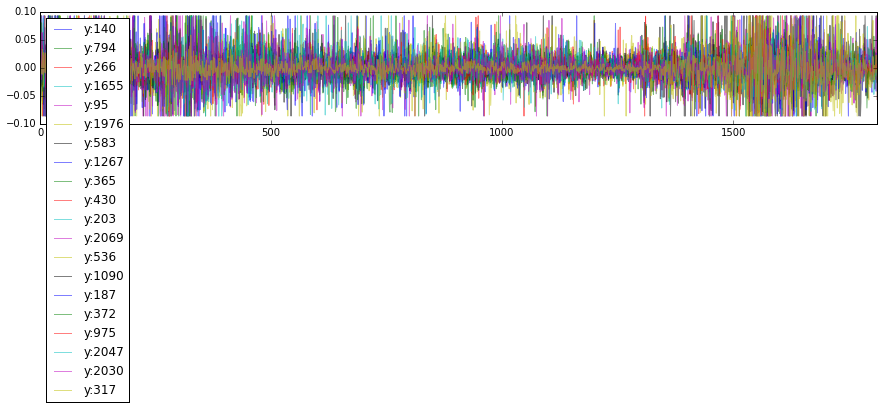

In [51]:
assets = np.random.permutation(id_counts.index.values)[:20]
print assets
r = multiple_assets_loopback(df[cols], assets, loopback=1)

r[[i for i in r.columns if i.startswith("y:")]].plot(alpha=.5, figsize=(15,2))

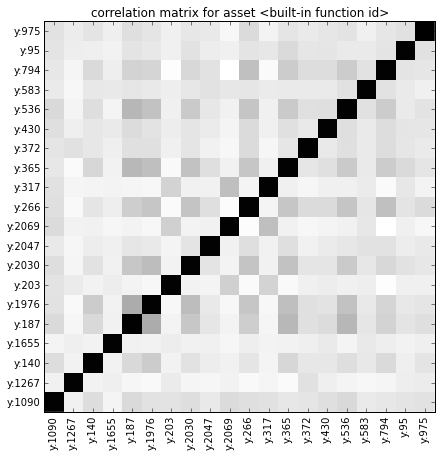

In [52]:
#assets = np.random.permutation(id_counts.index.values)[:20]
#print assets
#r = multiple_assets_loopback(df[cols], assets, loopback=1)
corr = r[[i for i in r.columns if i.startswith("y:") ]].corr().dropna()
corr = corr.ix[sorted(corr.index)][sorted(corr.columns)]
plt.figure(figsize=(7,7))
plt.imshow(corr.as_matrix(), cmap=plt.cm.Greys, origin="lower", interpolation="none")
plt.title("correlation matrix for asset "+str(id))
plt.yticks(range(len(corr)),corr.columns);
plt.xticks(range(len(corr)),corr.columns, rotation='vertical');


[ 259 1426  467 1464  559 1599 1138  846  679 1739 1810  713 1269  351 1259
 1501  925  430  507  154]


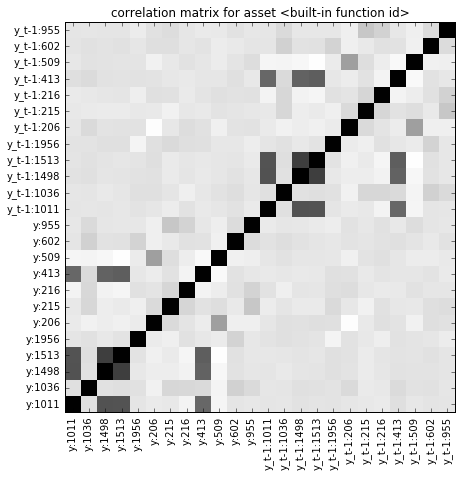

In [85]:
#assets = np.random.permutation(id_counts.index.values)[:20]
print assets
assets = assets1
r = multiple_assets_loopback(df[cols], assets, loopback=1)
corr = r[[i for i in r.columns if i.startswith("y") ]].corr().dropna()
corr = corr.ix[sorted(corr.index)][sorted(corr.columns)]
plt.figure(figsize=(7,7))
plt.imshow(corr.as_matrix(), cmap=plt.cm.Greys, origin="lower", interpolation="none")
plt.title("correlation matrix for asset "+str(id))
plt.yticks(range(len(corr)),corr.columns);
plt.xticks(range(len(corr)),corr.columns, rotation='vertical');


In [84]:
# correlation between some assets
assets1 = np.array([ 955, 1036,  215,  413, 1498,  216,  509,  602, 1956,  206, 1513, 1011])
assets2 = np.array([2070, 1073,  395, 1680, 1070,  296,   54,  677, 1310,  703])
assets3 = np.array([1636,  510, 2057, 1260,  199, 1966, 1884,  620, 2074, 1291, 2043,
       1511, 2033,  855, 1513,  709,  262,  943,   41, 2050,  492, 1150,
       1269, 1766, 1860,  240, 1500,  874, 2069, 1912])
assets4 = np.array([ 259, 1426,  467, 1464,  559, 1599, 1138,  846,  679, 1739, 1810,
        713, 1269,  351, 1259, 1501,  925,  430,  507,  154])

assets5 = np.array([317]) ## .54 accuracy on test bootstrapping

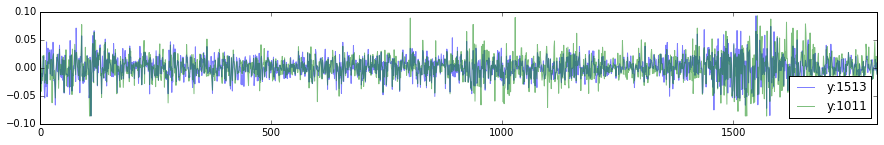

In [55]:
r = multiple_assets_loopback(df[cols], [1513,1011], loopback=1)
r[[i for i in r.columns if i.startswith("y:")]].plot(alpha=.5, figsize=(15,2))

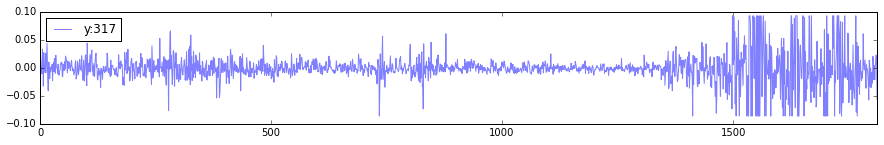

In [57]:
r = multiple_assets_loopback(df[cols], [317], loopback=1)
r[[i for i in r.columns if i.startswith("y:")]].plot(alpha=.5, figsize=(15,2))

In [90]:
s = r["y:317"].values
w=10
m = np.zeros(len(s)-2*w)
std = np.zeros(len(s)-2*w)
pos = np.zeros(len(s)-2*w)
for i in range(len(s)-2*w):
    m[i] = np.mean(s[i:i+2*w])
    std[i] = np.std(s[i:i+2*w])
    pos[i] = np.sum(s[i:i+2*w]>0)*1./(2*w)
s=s[2*w:]

(0, 1792)

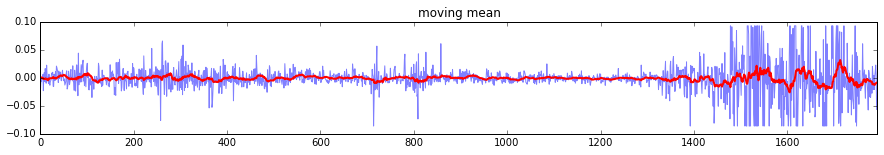

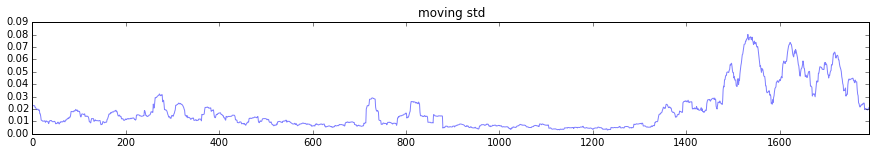

In [91]:
plt.figure(figsize=(15,2))
plt.plot(s, alpha=0.5)
plt.plot(m, color="red", lw=2)
plt.xlim(0,len(s))
plt.title("moving mean")
plt.figure(figsize=(15,2))
plt.plot(std, alpha=0.5)
plt.title("moving std")
plt.xlim(0,len(s))

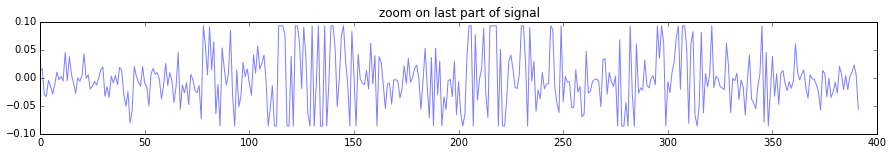

In [92]:
plt.figure(figsize=(15,2))
plt.plot(s[1400:], alpha=0.5)
plt.title("zoom on last part of signal")

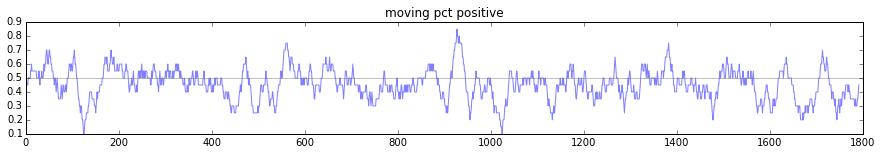

In [93]:
plt.figure(figsize=(15,2))
plt.plot(pos, alpha=0.5)
plt.title("moving pct positive")
plt.axhline(0.5, color="grey", alpha=0.5)

In [94]:
print np.sum(s>0)*1./len(s)
print np.sum(pos>0.5)*1./len(s)

0.454241071429
0.248883928571


In [87]:
cop = pd.read_csv("data/eurcop.csv")
cop.head()

,Date,Rate,High (est),Low (est)
0,1999-09-06,2068.55,0.0,0.0
1,1999-09-07,2078.17,2103.0,2053.7
2,1999-09-08,2091.05,0.0,0.0
3,1999-09-09,2093.84,2118.6,2069.4
4,1999-09-10,2087.55,0.0,0.0


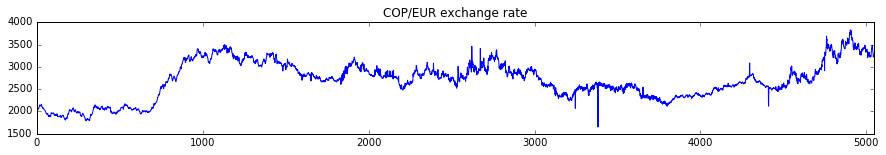

In [88]:
signal = cop.Rate.as_matrix()
plt.figure(figsize=(15,2))
plt.plot(signal)
plt.xlim([0, len(cop)])
plt.title("COP/EUR exchange rate")

In [95]:
ss = signal[1:]/signal[:-1]
ss=ss[(ss-1)**2<0.01]-1


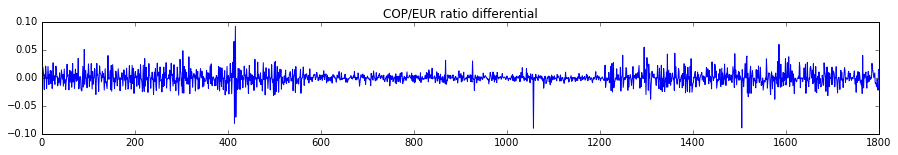

In [96]:
plt.figure(figsize=(15,2))
plt.plot(ss[-1800:])
plt.title("COP/EUR ratio differential")

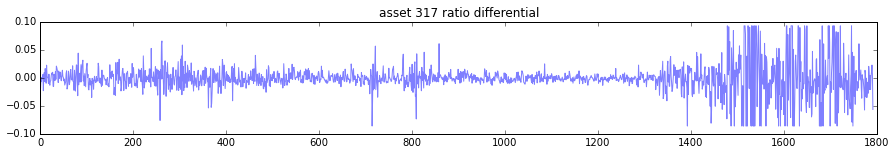

In [111]:
plt.figure(figsize=(15,2))
plt.plot(s, alpha=0.5)
plt.title("asset 317 ratio differential")

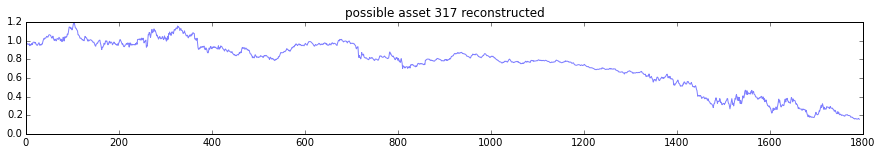

In [123]:
asignal = np.ones(len(s)+1)
for i in range(len(s)):
    asignal[i+1] = asignal[i]*(1+s[i])
    
plt.figure(figsize=(15,2))
plt.plot(asignal, alpha=0.5)
plt.title("possible asset 317 reconstructed")